In [1]:
import pandas as pd
import numpy as np

filename = 'allseason_20k_rawdata.json'

allseason = pd.read_json(filename)

base_df = allseason[['id','username','hashtags']]
base_df.index = base_df['id']
base_df = base_df.drop(columns=['username'])
base_df = base_df.drop(columns=['id'])

base_df.head()

,hashtags
id,
BtOm-dkHn5v,"[sport, travelling, winterfashion, cestovani, ..."
BtQp-IfHkzq,"[instagood, instastyle, fashionblog, fashionbl..."
BtRdH3UBQ6i,"[london, like4like, corduroy, beanie, ootd, uk..."
BtRJG92g_CG,[]
BtOpNQpApMI,"[styleover50, chiberia, styleisforlife, thrift..."


In [2]:
fashion_df = base_df[base_df.astype(str)['hashtags'] != '[]']
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17644 entries, BtOm-dkHn5v to BtCTPK7AJlC
Data columns (total 1 columns):
hashtags    17644 non-null object
dtypes: object(1)
memory usage: 275.7+ KB


In [3]:
# 태그가 몇번 나왔는지 세어주는 함수입니다.
def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

In [4]:
fashion_dict = getTagsDict(fashion_df)

In [5]:
def setTags(fashion_df):
    tag_df = list(fashion_df['hashtags'])

    for i in range(len(tag_df)):
        tag_df[i] = list(set(tag_df[i]))
        
    return tag_df

In [6]:
fashion_df['hashtags'] = setTags(fashion_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
fashion_df.head()

,hashtags
id,
BtOm-dkHn5v,"[travelling, hory, winter, skitour, mountains,..."
BtQp-IfHkzq,"[nordicsty, love, fashionblogger, vlog, instas..."
BtRdH3UBQ6i,"[corduroy, potd, ootd, wiw, fashion, trend, st..."
BtOpNQpApMI,"[midwestblogger, secondhandfirst, timelessstyl..."
BtRHyjZAem6,"[orange, followme, likeforfollow, style, selfi..."


# Tag merge and delete

### Merge all Tag

In [ ]:

accessory = ['accesorii', 'accessories', 'accessorize', 'accessory', 'womensaccessories','fashionaccessories', 'fashionaddict','styleaddict']
earring = ['statementearrings' ,'handmadeearrings earrings', 'earringsoftheday']
fallfashion = ['autumn', 'autumnfashion', 'aw18', 'fall', 'fall2018', 'fallcollection', 'fallfashion', 'fallfashion2018', 
               'falloutfit', 'falloutfits', 'fallstyle', 'fallvibes']
beach = ['beach', 'beachbody', 'beachbum', 'beachday', 'beachfashion', 'beachgirl', 'beachlife', 
         'beachstyle', 'beachvibes', 'beachwear']
baby =['baby', 'babyboutique', 'babyboy', 'babyfashion', 'babyfrillsboutique', 'babygirl',
       'babyitscoldoutside', 'babyshower', 'babystyle', 'babywear','babiesofinstagram']
bag = ['bag', 'bagaddict', 'bagaholic', 'bagdesign', 'bags', 'bagsale', 'bagshop']

bikini = ['bikini', 'bikinifashion', 'bikinigirl', 'bikinilife','bikinilover', 'bikinilovers', 'bikinimodel', 'bikinionline', 
          'bikinipushup', 'bikiniready','bikinis', 'bikiniseason', 'bikinistyle', 'bikinitop','sexybikini']
beanie = ['beanie', 'beanies', 'beanieseason']

black = ['blackwomeninsuits','blackmenwithstyle','blackmensfashion', 'blackmenstyle','blacklove','blackfashion','black']
bohemian = ['bohemian', 'bohemianstyle', 'boho', 'bohochic', 'bohofashion', 'boholuxe', 'bohostyle']
boy = ['boy', 'boymom', 'boys']

casual = ['casual', 'casualchic', 'casualfashion', 'casualoutfit', 'casualstyle', 'casualwear']
chic = ['chic','chicstyle']
children = ['childrenclothing', 'childrenfashion', 'childrensboutique', 'childrensfashion', 
            'childrenswear', 'childrenwear']

clothes =['clothes', 'clothing', 'clothingboutique', 'clothingbrand', 'clothingline', 'clothingstore']
cold = ['cold', 'coldday', 'colddays', 'coldweather', 'coldworld']
color = ['color','colorful', 'colors','colour', 'colourful']
classic = ['classic', 'classicstyle', 'classy', 'classyfashion']


coat = ['coat', 'coats', 'coatwinter', 'wintercoat','furcoat']

curvefashion = ['curve', 'curvefashion', 'curves', 'curvewomen', 'curvy', 'curvyfashion', 'curvygirl', 'curvywomen']

daily = ['daily', 'dailyfashion', 'dailylook', 'dailyoutfit']
daster = ['dasteradem', 'dasterbali', 'dastercantik', 'dastergrosir', 'dasterkancing', 'dasterkekinian', 'dastermahar', 
          'dastermotif', 'dasteronline', 'dasterrayon', 'dasterrumahan']
denim = ['denim', 'denimjacket']
dress = ['dress', 'dresses', 'dressoftheday', 'dresstoimpress', 'dressup']

fashion = ['2019fashion','fashion', 'fashion2018', 'fashion2019','fashionbombdaily','fashiondaily',]

fitness = ['fitness', 'fitnessgirl', 'fitnessmodel', 'fitnessmotivation', 'fitspo']
flower = ['floral', 'floraldress', 'floralkids', 'floralprint', 'florals', 'floralsleepsuit',
          'flower', 'floweroftheday', 'flowers']


girl = ['girldresses', 'girlfashion','girlsdresses', 'girlsfashion', 'girlstyle','girl','girls','fashionforgirls',
       'stylishgirl', 'stylishgirls']
hair = ['hair','hairfashion', 'hairstyle', 'hairstyles']
hat = ['hat', 'hats']
inspo = ['inspo', 'inspodaily','inspiration','styleinspiration', 'styleinspo','styleideas']

jewelry = ['ilovejewelry''handmadejewellery', 'handmadejewelry','instajewelry','jewellery', 'jewellerydesigner', 'jewelry', 'jewelryaddict', 'jewelrybox', 'jewelrydesign', 'jewelrydesigner', 'jewelryforsale', 'jewelrygram',
           'jewelryjunkie', 'jewelrylover', 'jewelrylovers', 'jewelrymaker', 'jewelryoftheday', 'jewelryparty', 'jewelryporn', 'jewelrysale', 'jewelrystore', 'jewelrytrends' 'nycjewerly','statementjewelry''fashionjewelry']


jacket = ['jacket', 'jackets', 'jaket', 'winterjacket','leatherjacket']
jean = ['jeans', 'jeanscollic']
kid = [ 'kids', 'kidsclothes', 'kidsfashion', 'kidsofinstagram', 'kidsootd', 'kidspartydress', 'kidsstyle','kidssummerfashion','stylishkids']
shirt = ['shirt', 'shirts']
shoe = ['shoe', 'shoeaddict', 'shoelove', 'shoelover', 'shoeoftheday', 'shoeporn', 'shoes', 'shoesaddict', 'shoesoftheday', 'shoestagram']

springfashion = ['spring', 'spring19', 'spring2019','springfashion2019','springiscoming','ilovespring',
    'springlook', 'springootd', 'springoutfit', 'springoutfits','springstyle', 'springstyles',
    'springbreak', 'springcollection', 'springcolors', 'springdress', 'springfashion','springishere',
    'springtime', 'springtrends']
springsummer = ['springsummer', 'springsummer2019',  'ss18', 'ss19','2019ss']
luxury = ['luxury', 'luxuryfashion', 'luxurylifestyle']
man = ['malefashion', 'malemodel', 'man','manfashion' 'men', 'menfashion', 'mens', 'mensclothing', 'mensfashion', 'mensfashionpost', 'mensfashionreview', 'menslook', 'mensoutfit', 'mensstyle', 'menstyle',
       'menswear', 'mensweardaily', 'menwithstyle','ootdmen','fashionformen','fashionmen','styleformen','stylishmen']
minimalism = ['minifashion', 'minifashionistas', 'minimalism', 'minimalist']
mom = ['mummyblogger', 'mumstyle' 'mom', 'momblogger', 'mombloggers','momdaughter', 'momfashion',
       'momlife', 'mompreneur', 'momsofinstagram', 'momstyle']
natural = ['natural', 'naturalbeauty', 'naturalhair', 'naturalista', 'naturallife',
           'naturalmakeup', 'nature', 'naturelovers', 'naturephotography']
nyc = ['newyork', 'newyorkcity', 'newyorkfashion', 'nyc' ,'nycstyle','nycblogger', 'nycfashion', 'nycphotographer']

online = ['online', 'onlineboutique', 'onlineclothingstore', 'onlinefashion', 'onlineshop', 'onlineshopping', 'onlinestore']

ootd = ['ootd', 'ootdfash', 'ootdfashion', 'ootdgals', 'ootdguide', 'ootdinspiration', 'ootdinspo', 'ootdmagazine' 'ootdshare', 'ootdstyle',
  'ootdsubmit', 'ootdwatch', 'outfit', 'outfitdetails', 'outfitgoals', 'outfitgram', 'outfitgrid', 'outfitideas', 'outfitinspiration', 'outfitinspo',
  'outfitoftheday', 'outfitpic', 'outfitpost', 'outfits', 'outfitsociety', 'outfitstyle', 'todayimwearing', 'todayslook', 'todaysoutfit',
  'whatimwearing', 'whatiwear', 'whatiweartoday', 'whatiwore', 'whatiworetoday', 'whattowear']


plussizefashion = ['plusfashion', 'plussize', 'plussizedresses', 'plussizefashion', 'plussizes', 'plussizeswomen']
pretty = ['pretty', 'prettygirls', 'prettyinpink', 'prettylittleiiinspo', 'prettylittlething']
red = ['red', 'reddress', 'redhair', 'redhead', 'redlips']
ring = ['ring', 'rings']
retro = ['retro', 'retrostyle']
runway = ['runway', 'runwayfashion', 'runwaylooks']

street = ['street', 'streetchic', 'streetfashion', 'streetphotography', 'streetstyle', 
          'streetstylefashion', 'streetstylelook', 'streetwear', 'streetwearfashion']
style = ['style', 'styleblog', 'styleblogger', 'stylebloggers', 'stylebook', 'stylecollective', 'styled', 'styledaily', 'styledbyme', 'stylediaries', 'stylediary', 'styleencore',
'styleencorebr', 'stylefashion', 'stylefile','stylegoals', 'stylegram', 'styleguide', 'styleicon',  'styleinfluencer', 'styleinfuencer',
'styleoftheday', 'styleover40', 'stylepost', 'styles', 'stylesavvy', 'styletips', 'stylewatch', 'styling', 'stylingaway', 'stylish', 'stylist']

summerfashion = ['summer', 'summer2018', 'summer2019', 'summerbaby', 'summerbody', 'summerclothes', 'summercollection', 'summerday', 'summerdays', 'summerdress', 'summeressentials', 
                 'summerfashion', 'summerfeeling', 'summerfun', 'summerholiday', 'summerishere', 'summerjam', 'summerkids',
'summerlin', 'summerlinlife', 'summerlook', 'summerlove', 'summerlovin', 'summernails', 'summernight', 'summernights', 'summeroutfit', 'summeroutfits', 'summerready', 'summers', 'summersale', 
                 'summerstyle', 'summertime', 'summertrends', 'summervacation', 'summervibes', 'summerwear', 'summerweather']

sunglasses = ['sunglasses', 'sunglassesaddic']
sweater = ['sweater', 'sweaters', 'sweaterseason', 'sweaterweather']
swim = ['swim', 'swimming', 'swimmingpool', 'swimsuit', 'swimwear', 'swimwearfashion', 'swimwearshoot']
teen = ['teen', 'teenfashion']
trend = ['trend', 'trendalert', 'trending', 'trendingfashion', 'trendingnow', 'trendit', 'trends', 'trendsetter', 'trendy', 'trendyclothes', 'trendyfashion']

vintage = ['vintage', 'vintagebyblema', 'vintageclothing', 'vintagefashion', 'vintagegirl', 'vintagehair', 'vintageinspired', 'vintagelook', 'vintageshop', 'vintagestyle']
wedding = ['wedding', 'weddingdress', 'weddings']
winterfashion = ['winter', 'winter2018', 'winter2019', 'winter2019collection', 'winterbreak' 'wintercollection', 'winterfashion', 'winterfashion2018', 'winterfashion2019',
                 'winterfun', 'winteriscoming', 'winterishere','winterjam', 'winterlook', 'wintermood', 'winterootd', 'winteroutfit', 'winteroutfits', 'winterpark', 'winters',
                 'wintersoldier', 'winterstyle', 'wintersun', 'wintertime', 'wintertrends', 'wintervibes', 'winterwear','winterclothes']

woman = ['woman', 'womancollection', 'womanfashion', 'womanpower', 'womansfashion', 'womanstyle', 'womanswear', 'women', 'womenempowerment', 'womenfashion', 'womenfasion', 'womeninbusiness', 'womens',
 'womensboutique', 'womensclothing', 'womensfashion', 'womensfitness', 'womensstyle',
'ladiesfashion','ladieswear']

In [ ]:
merges = [accessory,earring,fallfashion,beach,baby,bag,bikini,beanie,
black,bohemian,boy,casual,chic,children,clothes,cold,color,classic,
coat,curvefashion,daily,daster,denim,dress,fitness,flower,girl,
hair,hat,inspo,jewelry,jacket,jean,kid,shirt,shoe,springfashion,
springsummer,luxury,man,minimalism,mom,natural,nyc,online,ootd,
plussizefashion,pretty,red,ring,retro,runway,street,style,summerfashion,
sunglasses,sweater,swim,teen,trend,vintage,wedding,winterfashion,woman,fashion]


In [ ]:
len(merges)

In [ ]:
merges_name =  ['accessory','earring','fallfashion','beach','baby','bag','bikini','beanie',
'black','bohemian','boy','casual','chic','children','clothes','cold','color','classic',
'coat','curvefashion','daily','daster','denim','dress','fitness','flower','girl',
'hair','hat','inspo','jewelry','jacket','jean','kid','shirt','shoe','springfashion',
'springsummer','luxury','man','minimalism','mom','natural','nyc','online','ootd',
'plussizefashion','pretty','red','ring','retro','runway','street','style','summerfashion',
'sunglasses','sweater','swim','teen','trend','vintage','wedding','winterfashion','woman','fashion']

## 무식한 방법

In [ ]:
fashion_df_5k = fashion_df[:5000]

In [ ]:
fashion_df_5k.info()

In [ ]:
fashion_df_5k.head()

In [ ]:
def mergeData(df,merges,merges_name):
#     result_df = pd.DataFrame(0, index = np.arange(0,len(df)),columns=['Tags'])
    
#     for id,post in df.iterrows():
#         tags = post['hashtags']

#         i = -1
#         for merge in merges:
#             i += 1
#             for tag in tags:
#                 if tag in merge:
#                     #print('tag: ',tag,'merge: ',merge,'merge_name: ',merges_name[i])
#                     tags.remove(tag)
#                     tags.append(merges_name[i])
#                     #print(tags)

#         result_df['hashtags'] = tags
    
#     for id,post in df.iterrows():
#         result_df['hashtags'] = list(set(post['hashtags']))
        
    
    for i in range(len(df)):
        tags = df['hashtags'][i]
        
        new_tags = []
        for j in range(len(merges)):
            for k in range(len(tags)):
                if tags[k] in merges[j]:
                    new_tags.append(merges_name[j])
                else:
                    new_tags.append(tags[k])
        
        df['hashtags'].iloc[i] = list(new_tags)
                    
    
    #df['hashtags'] = setTags(df)

    return df
            
    

In [8]:
def nonono2(tags,merges,merges_name):
    new_tags = tags.copy()
    
    for j in range(len(merges)):
#         print('merges : ',merges[j])
#         print()
        deletetags = []
        for k in range(len(tags)):
#             print('tags : ', tags[k])
#             print()
            if tags[k] in merges[j]:
#                 print('remove : ',tags[k], ', append : ',merges_name[j])
                deletetags.append(tags[k])
        
        checkD = False
#         print('deleteTags : ', deletetags)
#         print(tags)
        for i in range(len(deletetags)):
            checkD = True
            tags.remove(deletetags[i])
        
        if checkD:
            tags.append(merges_name[j])
            
  
    return tags

In [ ]:
import time
start_time = time.time()

merge_df = mergeData(fashion_df_5k,merges,merges_name)
print(time.time() -start_time)

In [ ]:
merge_df['hashtags'][1]

# Top200개를 의미있는 것들로 채우기

In [ ]:
fashion_dict = getTagsDict(fashion_df)

In [ ]:
top200 = fashion_dict[-200:]

In [ ]:
top200

In [ ]:
fashion = ['fashion','fashionista','fashionpost','fashiongram','fashionable','fashionstyle','fashionlover',
          'fashiondiaries','fashioninspo','fashiondaily','fashionnova','fashionstylist']
winterfashion = ['winterfashion','winter','snow']
springfashion = ['springfashion','spring','springstyle']
style = ['style','stylish','styleinspo','stylist','styleoftheday','mystyle','stylegram','styleinspiration']
summerfashion = ['summerfashion','summer','summerstyle','summervibes','summertime']
ootd = ['ootd','outfitoftheday','lookoftheday','outfit','ootdfashion','todaysoutfit','outfitinspo',
       'whatiwore','whatiweartoday','wiwt','wiw','outfitideas','outfitinspiration','ootn','currentlywearing']
fallfashion = ['fallfashion','fall','fallstyle']
blogger = ['fashionblogger','styleblogger','blogger','fashionblog','bloggerstyle','lifestyleblogger',
           'blog',]
instagram = ['instafashion','instagood','instastyle','instagram','instadaily','instalike']
shopping = ['shopping','onlineshopping','boutiqueshopping','instashopping','frenzyshopping',
            'shoppingonline','shoppingaddict','shoptilldrop']
womenfashion = ['womensfashion','womenswear','womenstyle', 'woman','womenfashion']
sale = ['sale','sales']
boutique = ['boutique','boutiquefashion','onlineboutique']
streetstyle = ['streetstyle','street','streetwear','streetfashion']
model = ['model','fashionmodel','modeling']
trend = ['trendy','trend','trending','trends','ontrend','trendsetter']
photography = ['photography','photooftheday','picoftheday','fashionphotography','photoshoot','lookbook']
shop = ['shoplocal','instashop','shopsmall','shop','shoponline']
new = ['newarrivals','new','newcollection']
dress = ['dress','dresses']
beauty = ['beauty','beautiful']
accessory = ['fashionaddict','accessories','accessory']
men = ['mensfashion','man','menswear','men']
clothes = ['clothes','clothing']
designer = ['fashiondesigner','designer','fashiondesign','design']
vintage = ['vintage','vintagefashion']
jewelry = ['jewelry','handmadejewelry','jewelryaddict']
girl = ['girl','girlsfashion','girlsdresses','stylishgirls','fashionforgirls','girlboss']
fashionshow = ['fashionshow','fashionweek']
igfashion = ['igfashion','igstyle']
nyc = ['nyc','newyork']
follow = ['follow','followme']
sunglasses = ['sunglassesaddic','sunglasses']
casual = ['casual','casualstyle']

In [ ]:
tag_list = ['fashion', 'winterfashion', 'springfashion', 'style', 'summerfashion', 'ootd', 'fallfashion',
            'blogger', 'instagram', 'shopping', 'womenfashion','sale', 'boutique', 'streetstyle', 'model',
            'trend', 'men', 'photography', 'shop', 'new','dress','beauty','accessory', 'clothes', 'men',
            'designer', 'vintage','jewelry', 'girl', 'fashionshow', 'igfashion', 'nyc', 'follow',
            'sunglasses', 'casual']

In [ ]:
merges200 = [fashion,winterfashion, springfashion, style, summerfashion, ootd ,fallfashion, blogger ,instagram ,shopping,
             womenfashion, sale, boutique ,streetstyle, model, trend, men, photography, shop, new, dress , beauty ,
             accessory ,clothes, men, designer, vintage ,jewelry, girl, fashionshow ,igfashion, nyc ,follow, sunglasses,
             casual]

In [ ]:
for i in range(len(fashion_df)):
    fashion_df.iloc[i]['hashtags'] = nonono2(fashion_df.iloc[i]['hashtags'],merges200,tag_list)

In [ ]:
 fashion_df.iloc[11]['hashtags'] = nonono2( fashion_df.iloc[i]['hashtags'],merges200,tag_list)

In [ ]:
 fashion_df.iloc[127]['hashtags'] = nonono2( fashion_df.iloc[127]['hashtags'],merges200,tag_list)

In [ ]:
for i in range(len(fashion_df)):
    if 'summer' in  fashion_df.iloc[i]['hashtags']:
        print(i)

In [ ]:
count = 0
for merge in merges200:
    count += len(merge)
print(count)

In [ ]:
top200_df = mergeData(fashion_df,merges200,tag_list)

In [ ]:
for i in range(len(top200_df):
    test = top200_df['hashtags'][i]
    
    if 'fashionista' in test:
        print(test)

In [ ]:
top200_df.iloc[0]['hashtags']

In [ ]:
top200_dict = getTagsDict(top200_df)

In [ ]:
len(tag_list)

In [9]:
fashion_dict = getTagsDict(fashion_df)

In [10]:
fashion_dict = fashion_dict[-200:]

In [11]:
for key in fashion_dict:
    tag = key[0]
    index_fashion = tag.find('fashion')
    index_blog = tag.find('blog')
    if index_fashion > -1 and index_fashion < 1:
        fashion_dict.remove(key)
    if index_blog > -1 and index_blog < 1:
        fashion_dict.remove(key)

# Affinity Matrix

In [55]:

def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(0, index = np.arange(0,len(df)),columns=taglist)    
    
    for i in range(len(df)):
        list_of_row = list(df.iloc[i])[0]
    
        for tag in list_of_row:
            if tag in taglist:
                result_df[tag][i] = 1
        
    return result_df

In [54]:
testdf = fashion_df[:10]

In [56]:
testdddddddd =get_DataFrame_for_affinity(testdf,fashion_top)

df iloc[i][0] :  ['travelling', 'hory', 'winter', 'skitour', 'mountains', 'ruzenkanacestach', 'cestovani', 'travelblogger', 'kaprun', 'travelphotography', 'naturelovers', 'kitzsteinhorn', 'traveltips', 'travel', 'apresski', 'winterfashion', 'wintersports', 'ski', 'sport']

list of row :  ['travelling', 'hory', 'winter', 'skitour', 'mountains', 'ruzenkanacestach', 'cestovani', 'travelblogger', 'kaprun', 'travelphotography', 'naturelovers', 'kitzsteinhorn', 'traveltips', 'travel', 'apresski', 'winterfashion', 'wintersports', 'ski', 'sport']

df iloc[i][0] :  ['nordicsty', 'love', 'fashionblogger', 'vlog', 'instastyle', 'styleblogger', 'style', 'streetstyle', 'lookbook', 'fashionaddict', 'streetfashion', 'fashiondiaries', 'girl', 'womensfashion', 'outfit', 'instafashion', 'winterfashion', 'stylish', 'look', 'beauty', 'instagood', 'fashionaram', 'fashionweek', 'musthave', 'fashionpost', 'fashionista', 'fashionblog']

list of row :  ['nordicsty', 'love', 'fashionblogger', 'vlog', 'instastyl

In [13]:
#fashion_dict_5k = getTagsDict(fashion_df_5k)
# top200_dict = getTagsDict(top200_df)
# top200_dict[-84:]
merge_dict = getTagsDict(fashion_df)

In [14]:
merge_dict[-84:]

[('trending', 473),
 ('deals', 486),
 ('accessories', 502),
 ('vintage', 510),
 ('shop', 511),
 ('clothes', 513),
 ('fashiondaily', 513),
 ('designer', 521),
 ('summerstyle', 527),
 ('cute', 530),
 ('new', 531),
 ('streetfashion', 535),
 ('trend', 535),
 ('clothing', 537),
 ('girlsfashion', 552),
 ('lookbook', 557),
 ('fashionblog', 557),
 ('winteroutfit', 559),
 ('streetwear', 567),
 ('fashioninspo', 570),
 ('buy', 577),
 ('instashopping', 577),
 ('fashiondiaries', 585),
 ('fall', 586),
 ('womenstyle', 590),
 ('fashiondesigner', 599),
 ('beautiful', 602),
 ('whatiwore', 631),
 ('handmade', 640),
 ('fashionlover', 640),
 ('egypt', 647),
 ('outfitinspo', 649),
 ('todaysoutfit', 653),
 ('winterstyle', 668),
 ('womenfashion', 694),
 ('dress', 727),
 ('boutiqueshopping', 751),
 ('lookoftheday', 752),
 ('blogger', 753),
 ('shopsmall', 756),
 ('beauty', 774),
 ('instashop', 777),
 ('photooftheday', 792),
 ('newarrivals', 792),
 ('fashionstyle', 810),
 ('ootdfashion', 824),
 ('mensfashion', 8

In [ ]:
#fashion_dict_top = fashion_dict_5k[-200:]
#top84_dict = top200_dict[-84:]
fashion_top200 = merge_dict[-84:]

In [15]:
fashion_top = []
for i in fashion_dict:
    fashion_top.append(i[0])

In [16]:
post_matrix = get_DataFrame_for_affinity(fashion_df,fashion_top)

In [17]:
affinity_matrix = post_matrix.corr(method = 'pearson')

In [18]:
affinity_matrix_threshold = affinity_matrix.copy()

In [19]:
affinity_matrix.describe()

,sun,black,coat,newcollection,igstyle,bikini,menstyle,sales,modeling,me,...,womensfashion,shopping,winter,instafashion,ootd,style,fallfashion,summerfashion,springfashion,winterfashion
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,...,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.013849,0.005205,0.004402,0.005147,0.015960,0.003539,0.021201,0.004103,0.008159,0.023914,...,0.022684,0.077841,0.011309,0.070656,0.038865,0.075915,0.017742,0.033059,-0.013470,0.024688
std,0.100334,0.077034,0.078063,0.077166,0.084189,0.093786,0.094285,0.095176,0.084678,0.093808,...,0.092663,0.175321,0.100620,0.136718,0.102328,0.114396,0.101819,0.127522,0.100583,0.119436
min,-0.056597,-0.037581,-0.062917,-0.024510,-0.037563,-0.070953,-0.038757,-0.056883,-0.054470,-0.062143,...,-0.087141,-0.048958,-0.161655,-0.046125,-0.109902,-0.054437,-0.225603,-0.225603,-0.285029,-0.285029
25%,-0.016488,-0.011960,-0.013079,-0.011776,-0.012772,-0.016370,-0.012710,-0.017686,-0.015123,-0.013160,...,-0.017140,-0.017769,-0.031867,-0.008431,-0.006545,0.012911,-0.024387,-0.032255,-0.054470,-0.032034
50%,-0.012015,-0.005290,-0.007306,-0.006050,-0.004677,-0.012484,-0.007164,-0.012823,-0.009053,-0.007525,...,0.003617,0.003989,-0.012256,0.024395,0.031549,0.044144,0.018554,-0.005490,-0.021082,-0.000512
75%,-0.000914,0.008579,0.004114,0.006039,0.022398,-0.003683,0.015882,-0.007893,0.003642,0.021344,...,0.042700,0.059604,0.021480,0.067523,0.074572,0.092375,0.049145,0.048530,0.014089,0.041724
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
for tag in fashion_top:
    affinity_matrix_threshold[tag] = affinity_matrix[tag].apply(lambda x: x if x > 0.07 else 0)

In [21]:
affinity_matrix['summerfashion'].sort_values(ascending=False)

summerfashion       1.000000
summer              0.381463
egypt               0.286346
instashopping       0.283383
buy                 0.281238
summerstyle         0.261470
todaysoutfit        0.257027
whatiweartoday      0.255667
instashop           0.254536
frenzyshopping      0.254327
womenstyle          0.253785
deals               0.251906
womenswear          0.246541
sunglassesaddic     0.245161
shoptillyoudrop     0.241252
girlsfashion        0.238257
stylishgirls        0.229701
sale                0.229683
girlsdresses        0.228013
womenfashion        0.225279
summervibes         0.221953
summertime          0.208066
stylish             0.201576
onlineshopping      0.182114
shopping            0.179962
swimwear            0.179555
trendy              0.168836
bikini              0.161646
new                 0.157720
beach               0.155680
                      ...   
outfit             -0.042146
happy              -0.043925
styleblogger       -0.045247
shoppingonline

# Clustering

In [44]:
from sklearn.cluster import SpectralClustering

In [45]:
affinity_matrix_power = np.power(affinity_matrix,2)

In [46]:
sc = SpectralClustering(n_clusters=20,affinity='precomputed')

In [47]:
predict = pd.DataFrame(sc.fit_predict(affinity_matrix_power))

In [48]:
predict.columns = ['predict']

In [49]:
predict.head()

,predict
0,8
1,6
2,7
3,8
4,5


# Bulid Node

In [50]:
node_df = pd.DataFrame(fashion_dict, columns=['Tag','Freq'])

In [51]:
node_df

,Tag,Freq
0,sun,195
1,black,197
2,coat,198
3,newcollection,198
4,igstyle,198
5,bikini,198
6,menstyle,202
7,sales,202
8,modeling,203
9,me,206


In [52]:
node_df['Group'] = predict
node_df

,Tag,Freq,Group
0,sun,195,8
1,black,197,6
2,coat,198,7
3,newcollection,198,8
4,igstyle,198,5
5,bikini,198,11
6,menstyle,202,19
7,sales,202,16
8,modeling,203,13
9,me,206,1


In [53]:
node_df = node_df.sort_values(['Group'],ascending = True)
node_df.head()

,Tag,Freq,Group
18,shoponline,212,0
155,boutique,1122,0
20,shoppingonline,217,0
148,shoplocal,887,0
15,womensclothing,210,0


# Draw Graph

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

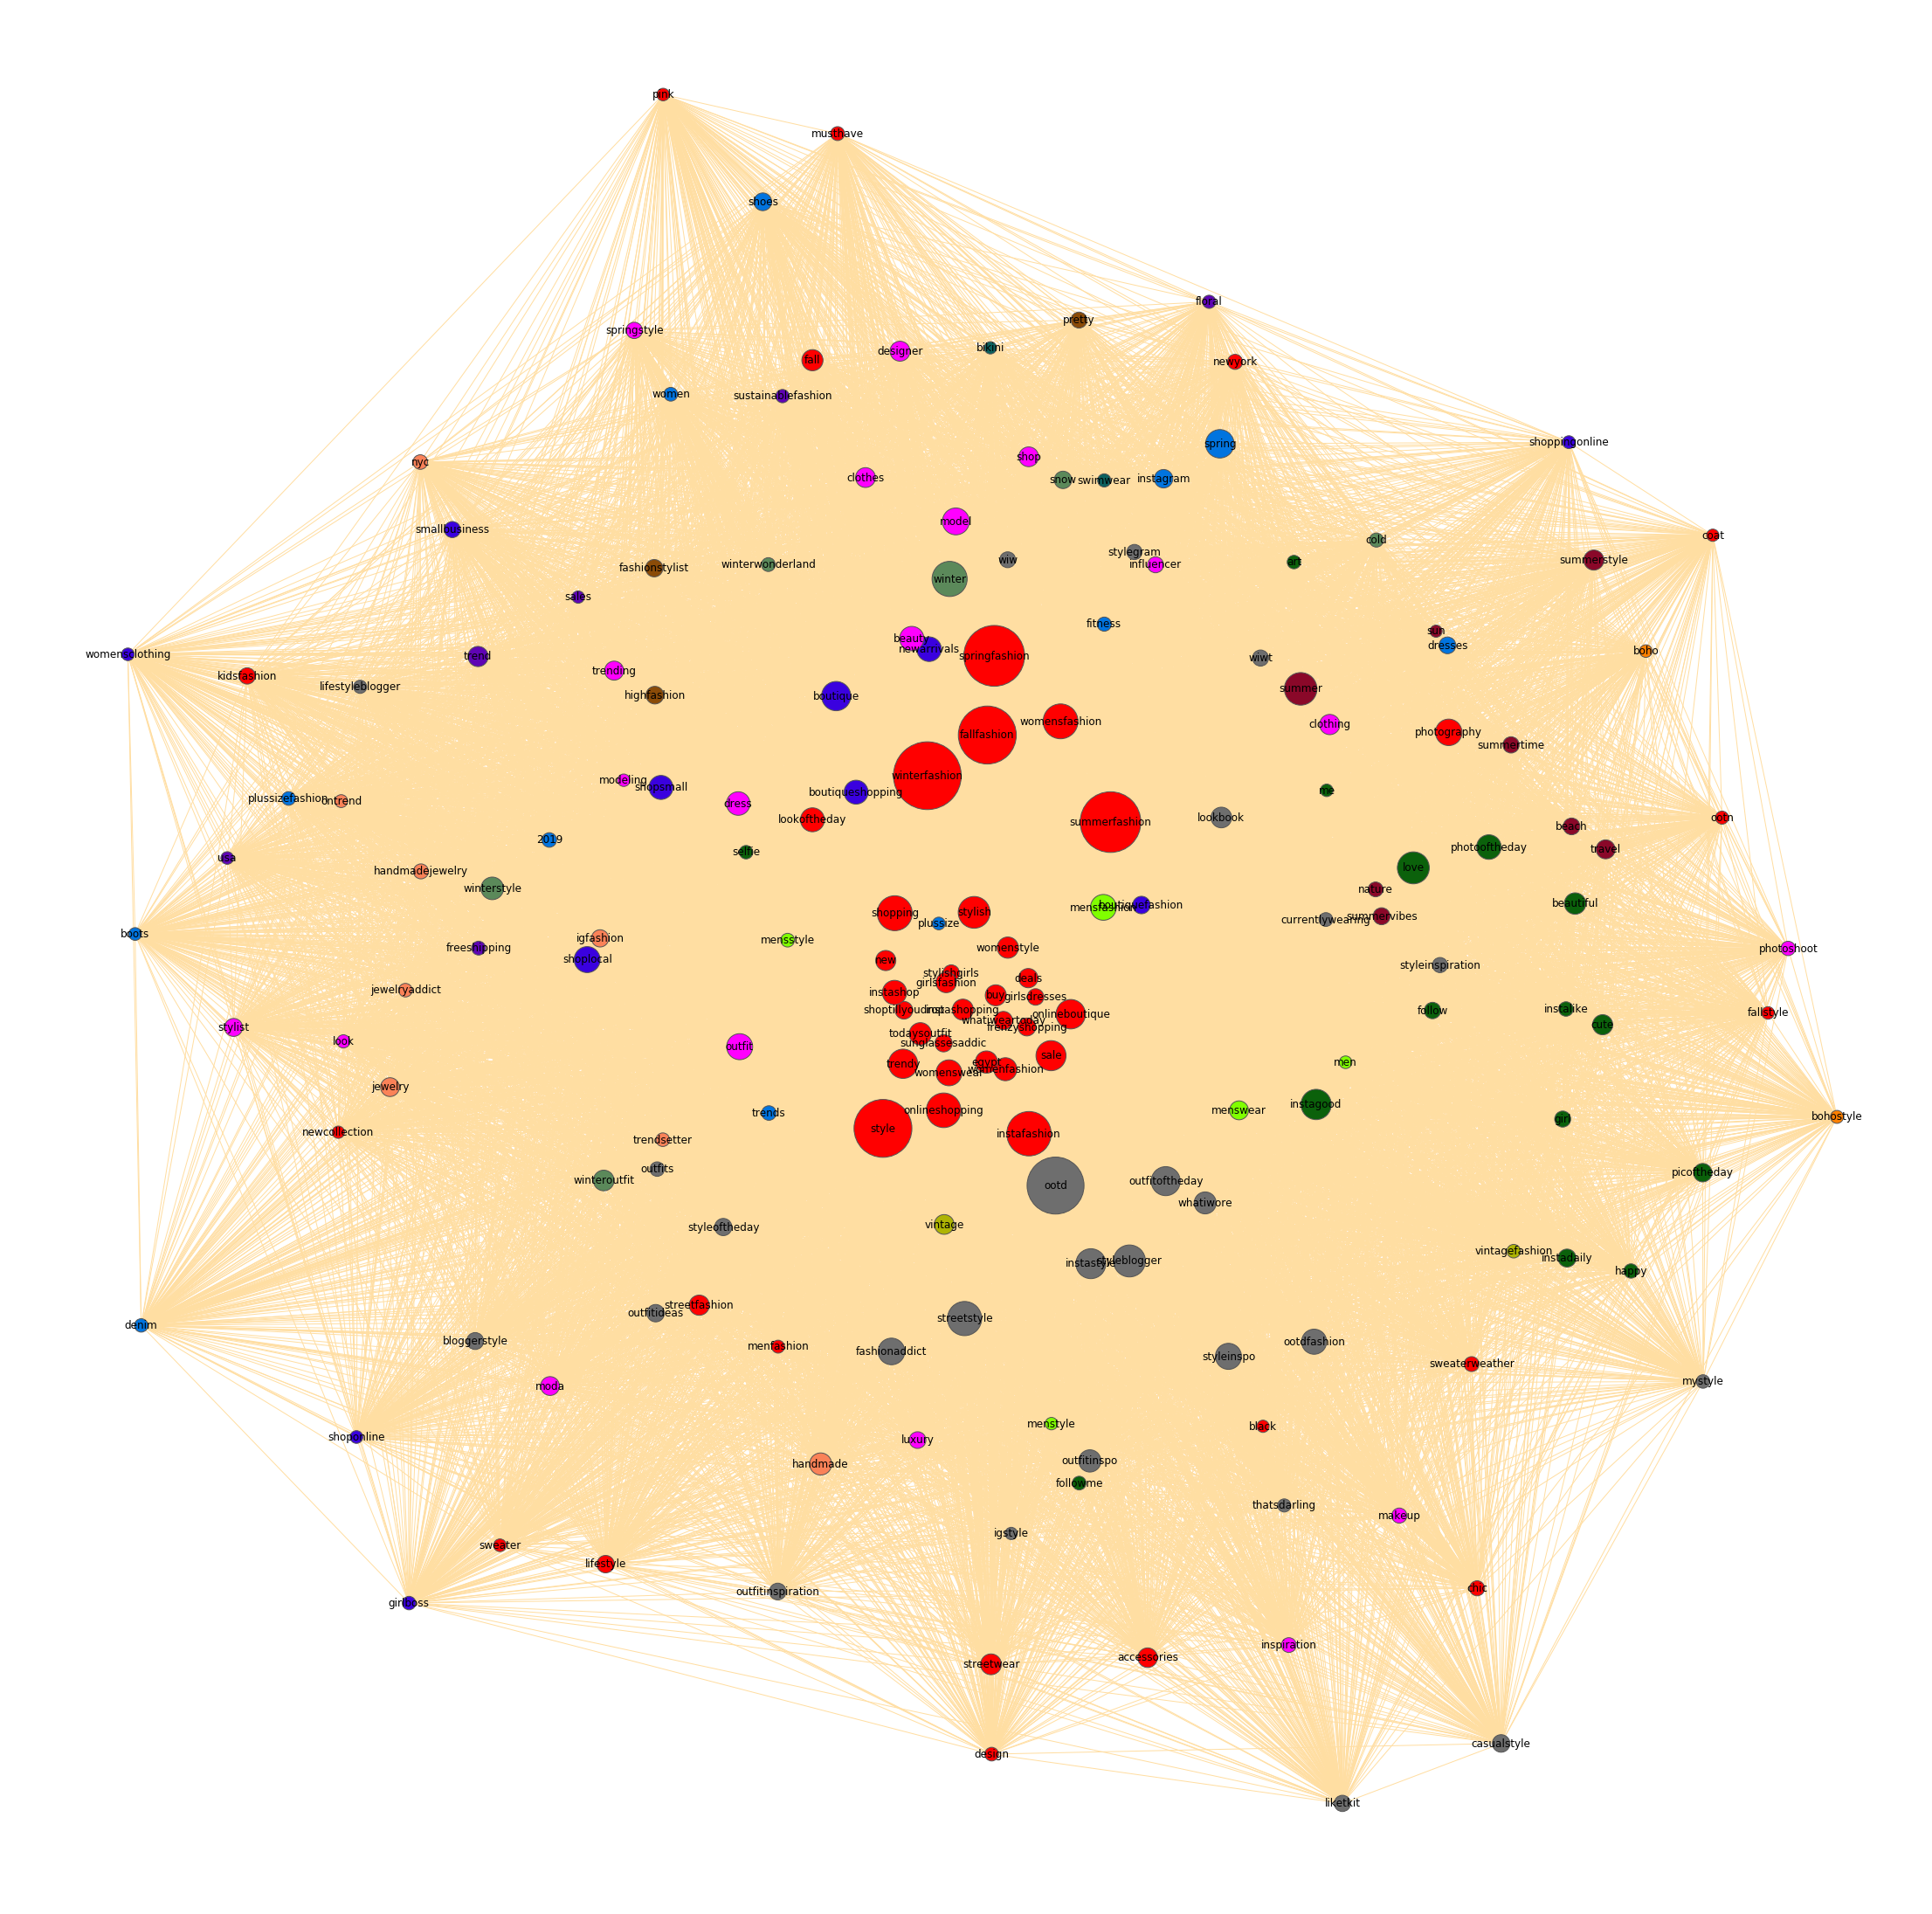

In [33]:
G = nx.Graph(day = "Stackoverflow")

for index,row in node_df.iterrows():
    G.add_node(row['Tag'], group = row['Group'], nodesize = row['Freq'])
    

#     
for index1,row1 in node_df.iterrows():
    for index2,row2 in node_df.iterrows():
        if row1['Tag'] == row2['Tag']:
            continue
        if affinity_matrix_power[row1['Tag']][row2['Tag']] > -1:
            G.add_edge(row1['Tag'],row2['Tag'],weight = affinity_matrix_power[row1['Tag']][row2['Tag']])

color_map = {1:'#FF0000', 2:'#FF8000', 3:'#AEB404', 4:'#80FF00', 5:'#0B610B', 6:'#0B615E',  
             7:'#6E6E6E', 0:'#0174DF', 8:'#3A01DF', 9:'#5F04B4', 10:'#FF00FF', 11:'#8A0829',
            12:'#8A4B08',13: '#FA8258' ,14:'#5B895A',15:'#5B895A',16:'#5B895A',17:'#5B895A',18:,'#5B895A'19:,'#5B895A',
            20:'#5B895A'}
plt.figure(figsize = (30,30))

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize'] for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.1, iterations=10), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
fig = plt.gcf()
plt.show()
fig.savefig('Hash_Network_Graph_image/allseason_0218_nomerge')

# Clustering Group

In [34]:
tmp = node_df[node_df.Group == 0]

In [35]:
tags = tmp.Tag

In [36]:
tags = list(tags)
print(tags)

['spring', '2019', 'plussize', 'trends', 'instagram', 'fitness', 'shoes', 'denim', 'women', 'plussizefashion', 'dresses', 'boots']


In [37]:
c_group = list()
for i in range(15):
    tmp = node_df[node_df.Group == i]
    tags = list(tmp.Tag)
    c_group.append(tags)

In [38]:
testarray = np.array(c_group)
croup = pd.DataFrame(testarray)

In [39]:
croup.columns = ['Tags']

In [40]:
croup

,Tags
0,"[spring, 2019, plussize, trends, instagram, fi..."
1,"[musthave, accessories, shopping, instafashion..."
2,"[bohostyle, boho]"
3,"[vintagefashion, vintage]"
4,"[menswear, men, mensfashion, menstyle, mensstyle]"
5,"[instadaily, photooftheday, instagood, cute, p..."
6,"[bikini, swimwear]"
7,"[ootd, currentlywearing, lookbook, mystyle, li..."
8,"[newarrivals, boutiquefashion, smallbusiness, ..."
9,"[floral, sustainablefashion, trend, sales, fre..."


In [41]:
a = croup.loc[1]

In [42]:
b = a['Tags']

In [43]:
b

['musthave',
 'accessories',
 'shopping',
 'instafashion',
 'deals',
 'onlineboutique',
 'stylishgirls',
 'trendy',
 'winterfashion',
 'womensfashion',
 'sweaterweather',
 'onlineshopping',
 'chic',
 'newyork',
 'whatiweartoday',
 'frenzyshopping',
 'shoptillyoudrop',
 'sale',
 'lifestyle',
 'springfashion',
 'sunglassesaddic',
 'stylish',
 'kidsfashion',
 'style',
 'fallfashion',
 'design',
 'new',
 'black',
 'coat',
 'newcollection',
 'photography',
 'womenswear',
 'instashop',
 'pink',
 'fallstyle',
 'lookoftheday',
 'womenfashion',
 'todaysoutfit',
 'summerfashion',
 'menfashion',
 'sweater',
 'girlsdresses',
 'ootn',
 'egypt',
 'streetfashion',
 'girlsfashion',
 'streetwear',
 'womenstyle',
 'buy',
 'fall',
 'instashopping']